In [44]:
import pandas as pd
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

output_path = "/run/media/yunchen/lacie"
RANDOM_STATE = 1234


In [45]:
def find_embedding_for_property(property_df,street_df,emb_df):
    street_with_embedding = street_df.merge(emb_df, left_index=True, right_index=True)
    output_df = property_df.merge(street_with_embedding,on=["street_sources","street_targets"])
    return output_df


In [46]:
akl_embedding_df = pd.read_csv(f"./outputs/akl_embedding_1667716704.csv")
AKL_df = pd.read_csv(f"{output_path}/outputs/property_data_with_street.csv",encoding='latin1')
AKL_df = AKL_df.drop(['Unnamed: 0'],axis=1)
embedding_size = akl_embedding_df.shape[1]

akl_embedding_df.columns = ['street_embedding_'+str(i) for i in range(embedding_size)]
akl_street_nodes_df = pd.read_csv(f"{output_path}/outputs/akl_street_nodes.csv")
akl_street_nodes_df = akl_street_nodes_df.rename(columns={"source": "street_sources", "target": "street_targets"})

AKL_df = find_embedding_for_property(AKL_df,akl_street_nodes_df,akl_embedding_df)

In [47]:
tsne_embedding_df = AKL_df[AKL_df.columns.intersection(akl_embedding_df.columns)]
print(tsne_embedding_df.shape)

(40737, 16)


In [48]:
angles = [0.1,0.2,0.3]
perplexities = [5,10,15,20]
n_iters = [1000,1500,2000]
for angle in angles:
    for p in perplexities:
        for n_iter in n_iters:
            tsne_embedded = TSNE(n_components=2,learning_rate='auto',angle=0.2,n_iter=2000, perplexity=15,random_state=RANDOM_STATE,verbose=1,n_jobs=-1).fit_transform(tsne_embedding_df.copy())

            df = pd.DataFrame()
            df["comp-1"] = tsne_embedded[:,0]
            df["comp-2"] = tsne_embedded[:,1]
            sns.scatterplot(x="comp-1", y="comp-2", data=df).set(title=f"T-SNE projection with angle={angle}, perplexity={p}, n_iter = {n_iter}")


[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 40737 samples in 0.001s...


/run/media/yunchen/lacie/projects/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 40737 samples in 0.241s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40737
[t-SNE] Computed conditional probabilities for sample 2000 / 40737
[t-SNE] Computed conditional probabilities for sample 3000 / 40737
[t-SNE] Computed conditional probabilities for sample 4000 / 40737
[t-SNE] Computed conditional probabilities for sample 5000 / 40737
[t-SNE] Computed conditional probabilities for sample 6000 / 40737
[t-SNE] Computed conditional probabilities for sample 7000 / 40737
[t-SNE] Computed conditional probabilities for sample 8000 / 40737
[t-SNE] Computed conditional probabilities for sample 9000 / 40737
[t-SNE] Computed conditional probabilities for sample 10000 / 40737
[t-SNE] Computed conditional probabilities for sample 11000 / 40737
[t-SNE] Computed conditional probabilities for sample 12000 / 40737
[t-SNE] Computed conditional probabilities for sample 13000 / 40737
[t-SNE] Computed conditional probabilities for sample 14000 / 40737

[Text(0.5, 1.0, 'T-SNE projection')]

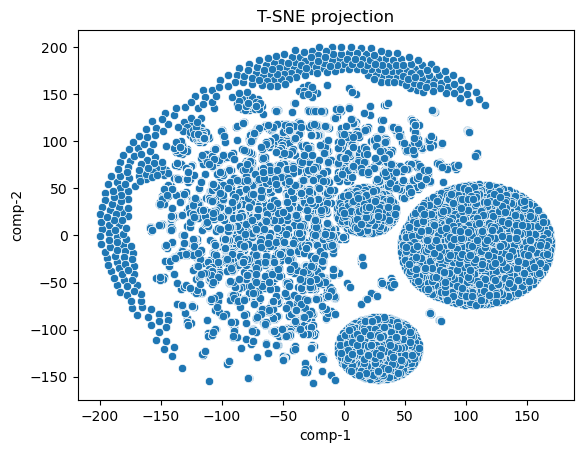

In [49]:
df = pd.DataFrame()
df["comp-1"] = tsne_embedded[:,0]
df["comp-2"] = tsne_embedded[:,1]

sns.scatterplot(x="comp-1", y="comp-2", data=df).set(title="T-SNE projection")

# def label_point(x, y, val, ax):
#     a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
#     for i, point in a.iterrows():
#         ax.text(point['x']+.02, point['y'], str(point['val']))
#
# label_point(df["comp-1"], df["comp-2"], df["y"], plt.gca())